In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.learn as skflow
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

df = pd.read_csv("data/boston.csv", header=0)
print(df.describe())

C:\ProgramData\Anaconda3\envs\cputf\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

<IPython.core.display.Javascript object>


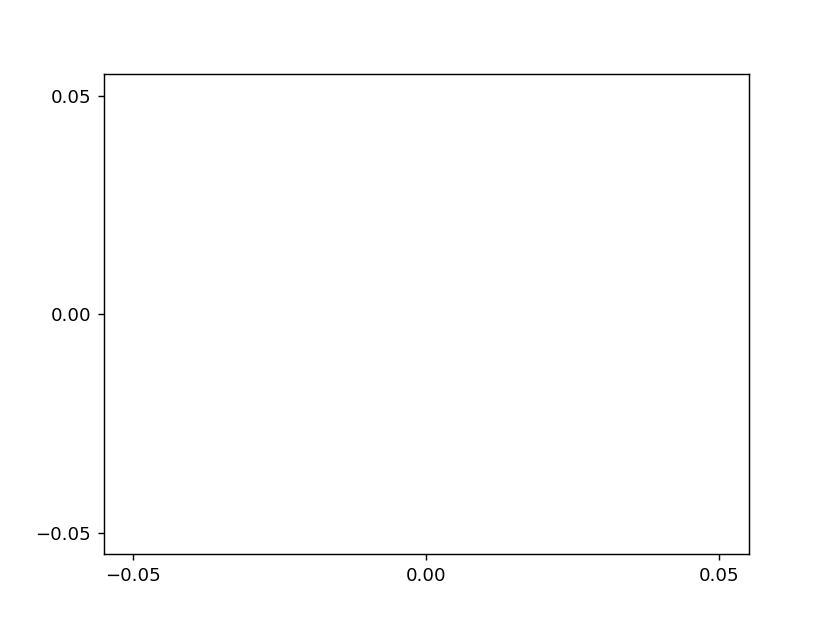

<IPython.core.display.Javascript object>


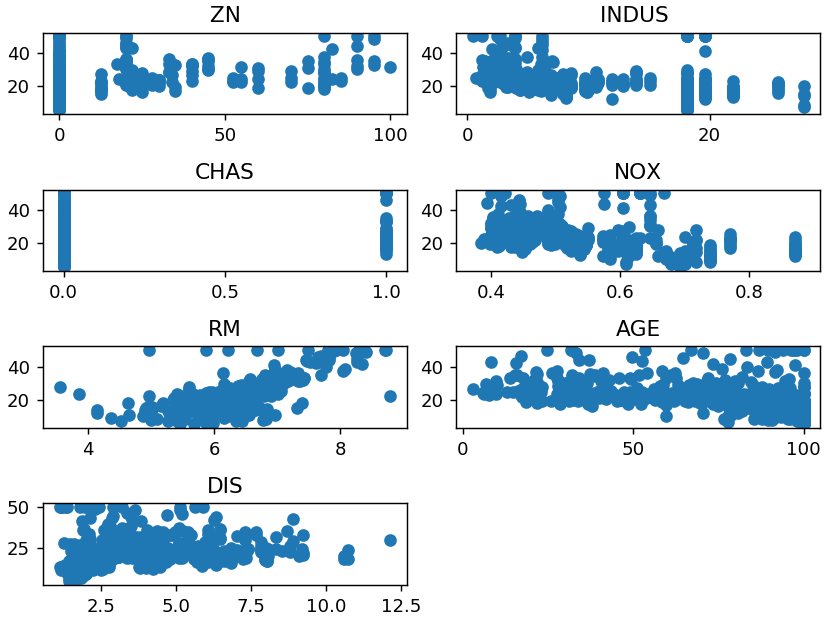

In [2]:
f, ax1 = plt.subplots()
plt.figure() # Create a new figure

y = df['MEDV']

for i in range (1,8):
    number = 420 + i
    ax1.locator_params(nbins=3)
    ax1 = plt.subplot(number)
    plt.title(list(df)[i])
    ax1.scatter(df[df.columns[i]],y) #Plot a scatter draw of the  datapoints
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


In [3]:
X = tf.placeholder("float", name="X") # create symbolic variables
Y = tf.placeholder("float", name = "Y")

In [4]:
with tf.name_scope("Model"):

    w = tf.Variable(tf.random_normal([2], stddev=0.01), name="b0") # create a shared variable
    b = tf.Variable(tf.random_normal([2], stddev=0.01), name="b1") # create a shared variable
    
    def model(X, w, b):
        return tf.multiply(X, w) + b # We just define the line as X*w + b0  
    y_model = model(X, w, b)

In [5]:
with tf.name_scope("CostFunction"):
    cost = tf.reduce_mean(tf.pow(Y-y_model, 2)) # use sqr error for cost function

In [6]:
train_op = tf.train.AdamOptimizer(0.01).minimize(cost)

In [7]:
sess = tf.Session()
init = tf.global_variables_initializer()
tf.train.write_graph(sess.graph, '/home/bonnin/linear2','graph.pbtxt')
cost_op = tf.summary.scalar("loss", cost)
merged = tf.summary.merge_all()
sess.run(init)
writer = tf.summary.FileWriter('/home/bonnin/linear2', sess.graph)
xvalues = df[['INDUS ', 'AGE']].values.astype(float)
yvalues = df[df.columns[12]].values.astype(float)
b0temp=b.eval(session=sess)
b1temp=w.eval(session=sess)


In [14]:
for a in range (1,50):
    cost1=0.0
    for i, j in zip(xvalues, yvalues):   
        sess.run(train_op, feed_dict={X: i, Y: j}) 
        cost1+=sess.run(cost, feed_dict={X: i, Y: i})/506.00
        #writer.add_summary(summary_str, i) 
    xvalues, yvalues = shuffle (xvalues, yvalues)
    print (cost1)
    b0temp=b.eval(session=sess)
    b1temp=w.eval(session=sess)
    print (b0temp)
    print (b1temp)
#plt.plot (trX, b0temp + b1temp * trX )

1583.3066561401133
[2.2552896 1.3012031]
[0.8027801  0.22135834]
1497.317065569724
[4.5037837 2.83779  ]
[0.96170956 0.19121012]
1508.817006800956
[6.575458 4.315777]
[0.9202074  0.20626052]
1507.4178892407026
[8.478126  5.6730576]
[0.79247266 0.15660428]
1516.3133449215197
[10.34334    7.0509996]
[0.6360689  0.16561256]
1517.4062202212356
[12.034926  8.288743]
[0.46105438 0.11395656]
1535.542128664703
[13.799205  9.585801]
[0.4407034  0.13849953]
1530.0591910441408
[15.302893 10.803413]
[0.20200391 0.1252264 ]
1545.3666420397553
[16.836536 11.914133]
[0.15311037 0.07454027]
1551.1375021614115
[18.29586  13.071592]
[0.11709186 0.09042379]
1566.651366622081
[19.58481 14.15906]
[0.0071973  0.07745683]
1570.3417397186213
[20.792927  15.2020645]
[-0.06350461  0.07815652]
1577.6787971074402
[21.840576 16.176676]
[-0.20728853  0.02852415]
1586.4435828099631
[22.955523 17.156664]
[-0.11349106  0.04699818]
1597.5659492138345
[23.822254 18.069494]
[-0.21888517  0.01920354]
1605.0577841973604
[2